# Clustering

An issue in clustering is how to determine the similarity between two objects, so that clusters can be formed from objects, with high similarity within clusters and low similarity between clusters. Commonly, to measure similarity or dissimilarity between objects, a distance measure such as Euclidean, Manhattan and Minkowski is used. A distance function returns a lower value for pairs of objects that are more similar to one another.

All these three distance (Euclidean,Manhattan and Minkowski) measures are only valid for continuous variables. In the instance of categorical variables the Hamming distance must be used.

In large dimension Euclidean distance is not useful anymore. Therefore, other measures such as cosine similarity is used which is less affected by high dimension.



## k means 


KMeans is a clustering is an iterative algorithm. Its purpose is to partition a set of vectors into K groups that cluster around common mean vector.  The basic K-means is sensitive to the initial centre and easy to get stuck at local optimal value.

The objective of the K-means clustering is to minimize the Euclidean distance that each point has from the centroid of the cluster. This is known as intra-cluster variance (an square error function).

K-Means clustering algorithm fails to give good results when the data contains outliers, the density spread of data points across the data space is different and the data points follow non-convex shapes.

K-Mean algorithm  has some limitations. One of the limitation it has is, it makes hard assignments(A point either completely belongs to a cluster or not belongs at all) of points to clusters. Both, Gaussian mixture models and Fuzzy K-means allows soft assignments.

K-means is a special case of Gaussian Mixture Models (GMM). GMM assumes that the data comes from a mixture of K Gaussian distributions.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:. K-Means is an example of an algorithm which uses an Expectation-Maximization (EM) approach to arrive at the solution. its a two step appraoch

      - Guess some cluster centers
      - Repeat until converged 
                  A. Assign points to the nearest cluster center (E-step)
                  B. Set the cluster centers to the mean (M-step)
            
The output of the K-means are the centroids of the K clusters, which can be used to label new data


- It is unsupervised because the points have no external classification.
- k-means involves an intuitive iterative approach known as expectation–maximization (EM).
- Initialize cluster centroids randomly and repeat until convergence:
- Sensitive to scale - Rescaling your datasets will completely change results. 
- needs linear separability of the clusters
- need to specify the number of clusters
- does not converge to the true global maximum even with a good initialization when there are many points or dimensions
- K-Means is a distance-based algorithm, this difference of magnitude can create a problem
- Feature scaling ensures that all the features get same weight in the clustering analysis.
- K-means is extremely sensitive to cluster center initialization. Also, bad initialization can lead to Poor convergence speed as well as bad overall clustering.

__Evaluation Metrics__

- Inertia (intra cluster distance) the distance between them should be as low as possible.
- Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances. More is better.

__Finding Optimal K__

Elbow method is used  for finding the optimal number of clusters. The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t give much better modeling of the data.


__Inertia__

- Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

- Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

__k-means is limited to linear cluster boundaries__

- suffers from the problem of convergence at local optima

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

Clustering methods such as K-means have hard boundaries (hard clustering algorithms), meaning a data point either belongs to that cluster or it doesn't. On the other hand, clustering methods such as Gaussian Mixture Models (GMM) have soft boundaries, where data points can belong to multiple cluster at the same time but with different degrees of belief. e.g. a data point can have a 60% of belonging to cluster 1, 40% of belonging to cluster 2. 

GMM use maximum likelihood to find the optimal parameter (mean and variance). GMM uses Mahalanobis distance 

__Choosing the right K__

 1. Within Cluster Sum of Squares (or inertia). It should be low. Here's the formula representation for example when K = 3

 2. The silhouette of a point measures how similar a point is to its cluster versus the next closest cluster.




__Q. For two runs of K-Mean clustering is it expected to get same clustering results__

K-Means clustering algorithm instead converses on local minima which might also correspond to the global minima in some cases but not always. Therefore, it’s advised to run the K-Means algorithm multiple times before drawing inferences about the clusters.

However, note that it’s possible to receive same clustering results from K-means by setting the same seed value for each run. But that is done by simply making the algorithm choose the set of same random no. for each run.

In [15]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

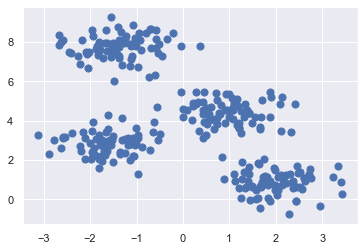

In [9]:
# create dataset
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

__What is N_init in K means?__

Maximum number of iterations of the k-means algorithm for a single run. n_init : int, default: 10. Number of time the k-means algorithm will be run with different centroid seeds.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [17]:
# Get the cluster centroids (coordinates of cluster centres)
kmeans.cluster_centers_
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1
0,1.982583,0.867713
1,-1.373244,7.753689
2,-1.584385,2.830813
3,0.949735,4.419069


In [6]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

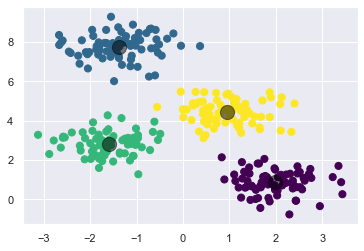

In [10]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Within Cluster Sum of Square (inertia)

In [12]:
# inertia_ : Sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

212.00599621083478

### Elbow method to determine optimal k

k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE). The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

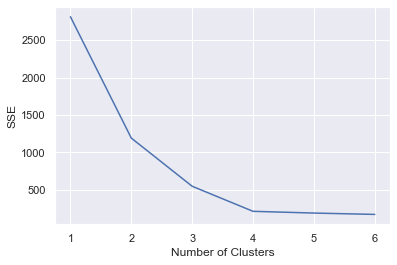

In [20]:
n_cluster = [1,2,3,4,5,6]
SSE = []
for k in n_cluster:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    SSE.append(k_means.inertia_)

plt.plot(n_cluster, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

# Clustering Performance Evaluation

### 1. Silhouette ranges

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

If the labels are known then you can evaluate the clustering procedure with Silhouette  Coefficient. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

In [11]:
# silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.6819938690643478


### 2. Rand Index

Rand index is the measure of the similarity between two data clustering. Rand index is related to the accuracy, but is applicable even when class labels are not used.

Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

In [21]:
#1  Adjusted rand index
from sklearn.metrics.cluster import adjusted_rand_score
   
labels_true = [0, 0, 1, 1, 1, 1]
labels_pred = [0, 0, 2, 2, 3, 3]

adjusted_rand_score(labels_true, labels_pred)

0.4444444444444445

In [1]:
# Perfectly matching labelings have a score of 1 even

from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

1.0

### 3. Normalized mutual info

In [22]:
# normalized mutual info
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score (labels_true, labels_pred)

0.7336804366512113

In [23]:
# adjusted mutual info score
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score (labels_true, labels_pred)

0.6153846153846159